# Variable transformers

In this notebook, I will show you how to use the different variable transformers from feature_engine. This transformers apply mathematical transformations to the numerical variables.

For the demo, I will use the house price dataset, available in [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

from feature_engine import variable_transformers as vt

In [2]:
def load_houseprice():
    data = pd.read_csv('houseprice.csv')
    return data

In [3]:
data = load_houseprice()
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

## LogTransformer

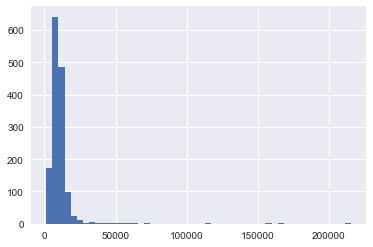

In [4]:
data['LotArea'].hist(bins=50)

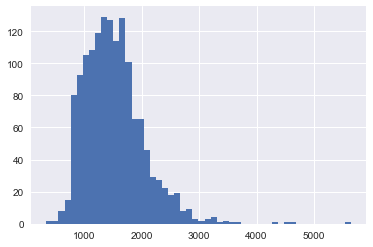

In [5]:
data['GrLivArea'].hist(bins=50)

In [6]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [7]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [8]:
data_tf = lt.transform(data)

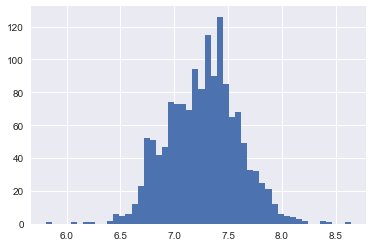

In [9]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

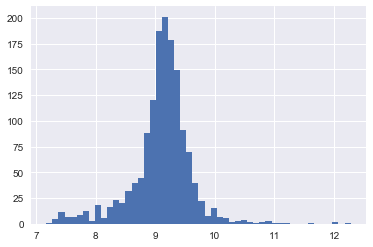

In [10]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

## ReciprocalTransformer

In [11]:
data = load_houseprice()

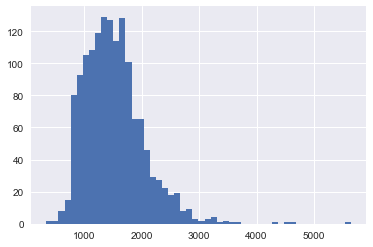

In [12]:
data['GrLivArea'].hist(bins=50)

In [13]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [14]:
data_tf = rt.transform(data)

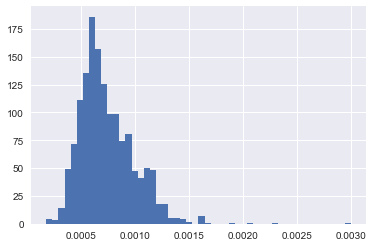

In [15]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

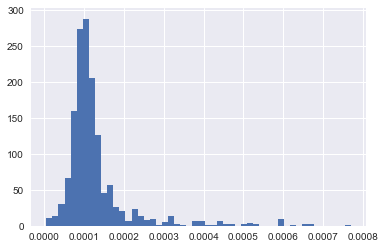

In [16]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

## ExponentialTransformer

In [17]:
data = load_houseprice()

In [18]:
et = vt.ExponentialTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

ExponentialTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [19]:
data_tf = et.transform(data)

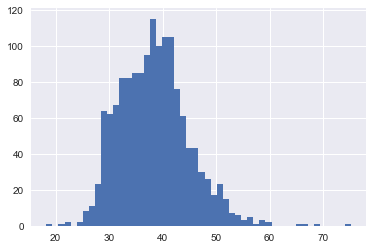

In [20]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

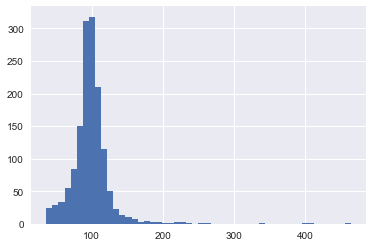

In [21]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

## BoxCoxTransformer

In [22]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [23]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict

{'GrLivArea': 0.0063048860380204392, 'LotArea': 0.030946318971935564}

In [24]:
data_tf = bct.transform(data)

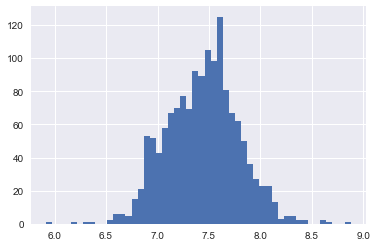

In [25]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

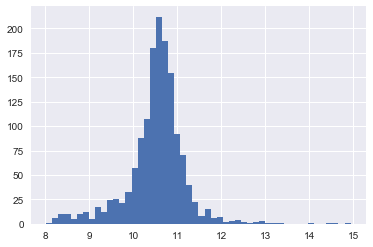

In [26]:
# transformed variable
data_tf['LotArea'].hist(bins=50)